# Simulation of morphologic evolution of a scarp profile

This notebook creates and runs a little simulation model of morphologic evolution of an initial scarp.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

The block below defines the code for the model:

In [2]:
class ScarpEvolver(object):
    
    def __init__(self,
                 creep_coefficient=0.001,
                 scarp_length=100,
                 num_nodes=100,
                 scarp_height=10.0,
                 initial_angle=35.0,
                 diffusion_number=0.2,
                ):
        """Initialize the ScarpEvolver.

        Parameters
        ----------
        creep_coefficient: float
            soil creep coefficient, m2/yr
        scarp_length: float
            length of domain, m
        num_nodes: int
            number of nodes
        scarp_height: float
            initial height of scarp, m
        initial_angle: float
            initial angle of scarp, degrees
        diffusion_number: float
            diffusion number
        """
        self.scarp_length = scarp_length
        self.alpha = diffusion_number  # must be <= 1/2 for numerical stability
        self.dx = scarp_length / (num_nodes - 1)
        self.timestep_duration = self.alpha * self.dx * self.dx / creep_coefficient
        self.elev = np.zeros(num_nodes)
        
        m = np.tan(np.radians(initial_angle))
        b = 0.5 * (scarp_height - m * scarp_length)
        self.x = np.linspace(0, scarp_length, num_nodes)
        self.elev[:] = m * self.x + b
        self.elev[self.elev < 0.0] = 0.0
        self.elev[self.elev > scarp_height] = scarp_height

    def run_one_step(self):
        """Advance for one time step"""
        self.elev[1:-1] += self.alpha * (self.elev[2:] - 2 * self.elev[1:-1] + self.elev[:-2])
        
    def run_n_steps(self, n):
        for i in range(n):
            self.run_one_step()

In the next block, we creat an *instance* of the model. This initializes it but does not actually run it.

In [3]:
scarp_length = 100.0
scarp_height = 10.0
md = ScarpEvolver(scarp_length=scarp_length, scarp_height=scarp_height)

Let's check what the time-step size is:

In [4]:
print('Time step size is ' + str(md.timestep_duration) + ' years.')

Time step size is 204.0608101214162 years.


Set some parameters that will control our run and the capturing of output:

In [5]:
nsteps = 100
save_every = 2

The next few cells set up the animation

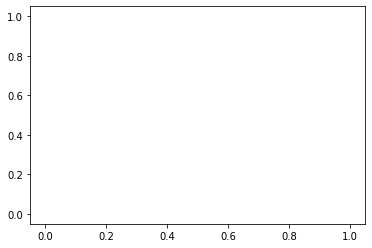

In [6]:
# First, set up a blank figure
fig, ax = plt.subplots()

# And placeholder lists for data
xdata = []
ydata = []
obj = ax.plot([], [], color = 'k')

In [7]:
# Then, set up an initialization function
def init():
    ax.set_xlim(0, scarp_length)
    ax.set_ylim(0, scarp_height)
    ax.set_xlabel('Distance (m)')
    ax.set_ylabel('Elevation (m)')
    return(obj)

In [8]:
# Next, define the update function
def update(i):
    ax.cla()
    md.run_n_steps(save_every)
    xdata = md.x
    ydata = md.elev
    ax.set_xlabel('Distance (m)')
    ax.set_ylabel('Elevation (m)')
    obj = ax.plot(xdata, ydata, color = 'k')
    return(obj)

Now, use FuncAnimation to run the model.

In [9]:
# Run the animation!
anim = FuncAnimation(fig, update, 100, init_func = init, blit = True)
plt.show()

In [10]:
# Convert the animation to HTML
vid = HTML(anim.to_html5_video())

In [11]:
vid
# If you modify any component of the animation, restart your iPython kernel and re-run all of the above cells.